<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/Simula%C3%A7%C3%A3oSerieTemporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def epsilon(mean,sigma):
    return np.random.normal(mean,sigma, 1)

In [3]:
def time_series_generation(e_mean, e_sigma, mean=4, sigma=2.2, samples=100):
  Y= [None]*samples
  Y[0] = np.random.normal(mean,sigma, 1)[0]
  for t in range(0,samples-1):
    Y[t+1] = 1 + 0.9 * Y[t] + epsilon(e_mean,e_sigma)[0]
  return Y

In [4]:
Y = time_series_generation(e_mean=0, e_sigma=1 )

In [5]:
series = pd.DataFrame({'y':Y, 'data':np.array([datetime.datetime(2013+i , 9, 28) for i in range(100)])})

In [6]:
series

,y,data
0,1.521878,2013-09-28
1,1.999161,2014-09-28
2,3.157458,2015-09-28
3,1.718076,2016-09-28
4,4.525609,2017-09-28
...,...,...
95,11.345808,2108-09-28
96,10.001468,2109-09-28
97,8.615913,2110-09-28
98,8.630349,2111-09-28


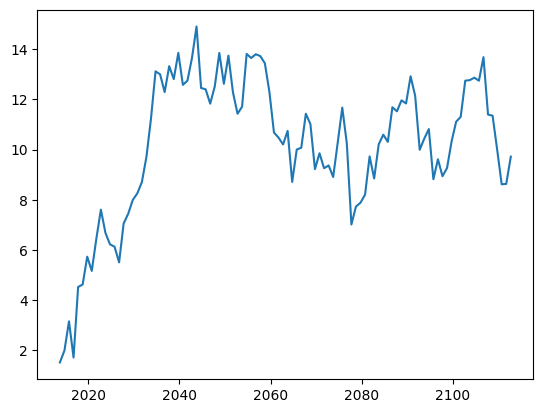

In [7]:
plt.plot(series.data,series.y)

AR, MA e ARMA

Ajustando o modelo AR

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']

<Axes: >

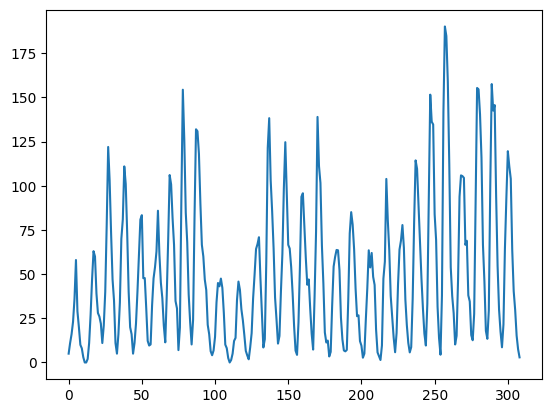

In [9]:
data.plot()

In [10]:
def AR_model_generation(ts, p):
  model = ARIMA(ts, order=[p,0,0])
  model_fit = model.fit()
  return model_fit

In [11]:
AR1 = AR_model_generation(data, 1)
AR2 = AR_model_generation(data, 2)

In [12]:
AR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Fri, 09 Aug 2024   AIC                           2819.169
Time:                        11:28:01   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      67.895
ar.L1          0.8244      0.036     23.011      0.000       0.754       0.895
sigma2       524.5565     39.103     13.415      0.000     447.916     601.197
===================================================================================
Ljung-Box (L1) (Q):                 100.01   Jarque-Bera (JB):               135.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

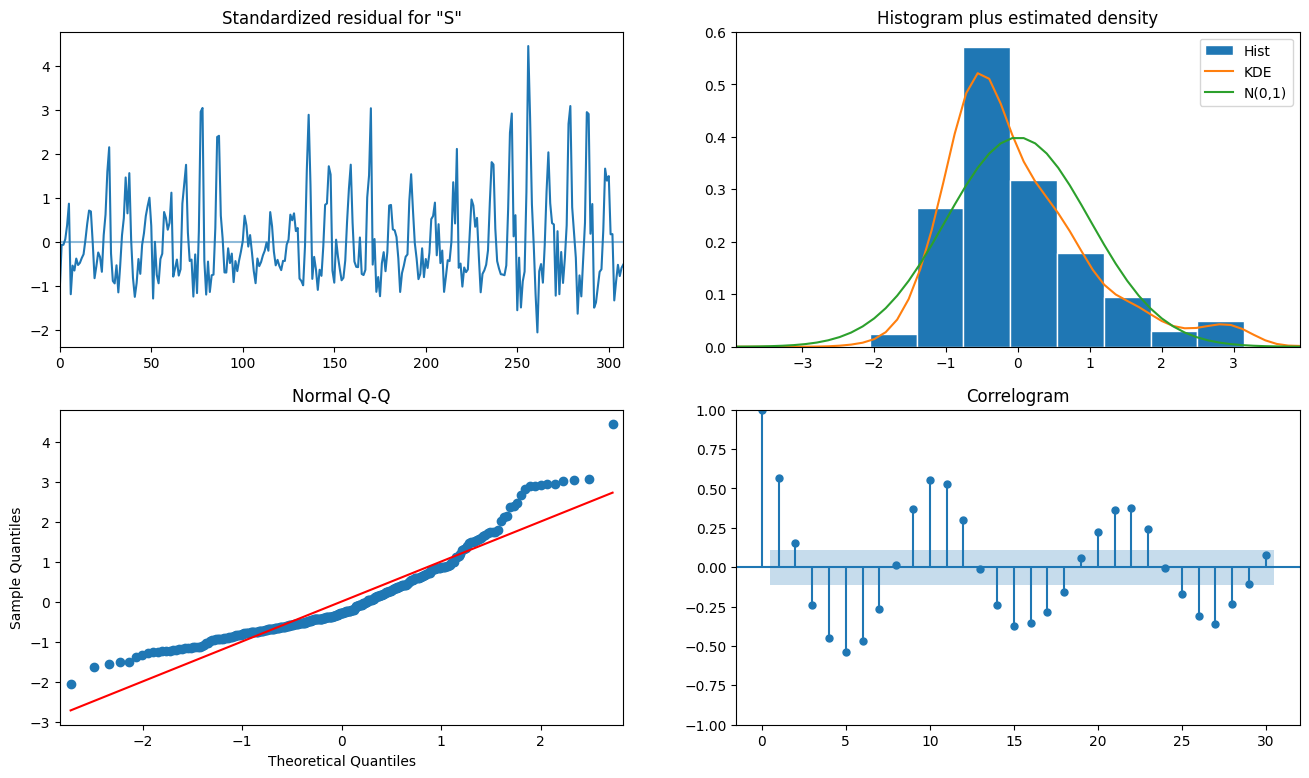

In [13]:
fig = plt.figure(figsize=(16,9))
fig = AR1.plot_diagnostics(fig=fig, lags=30)

AR(2)

In [14]:
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Fri, 09 Aug 2024   AIC                           2622.637
Time:                        11:28:05   BIC                           2637.570
Sample:                             0   HQIC                          2628.607
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.000      -0.758      -0.619
sigma2       274.7272     18.897     14.538      0.000     237.689     311.765
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                80.38
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

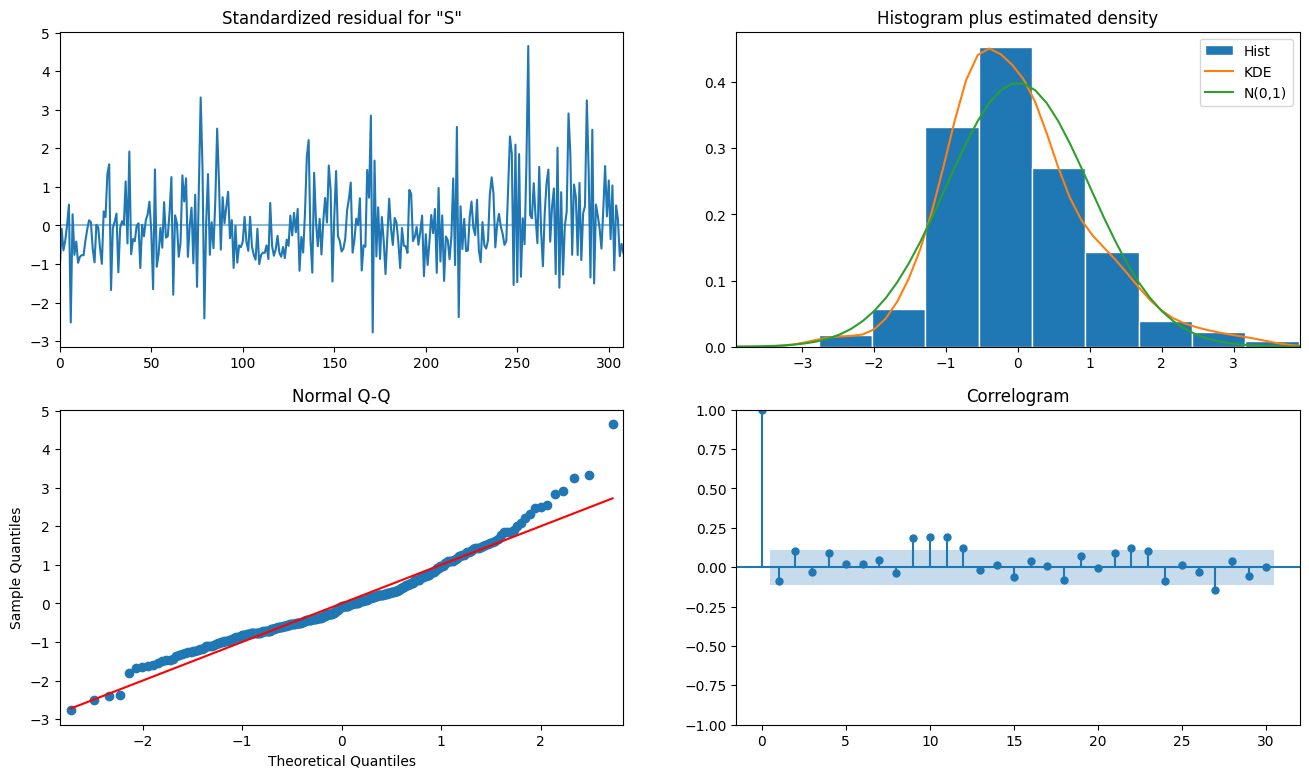

In [15]:
fig2 = plt.figure(figsize=(16,9))
fig_final = AR2.plot_diagnostics(fig=fig2, lags=30)

# Moving Average Model

In [16]:
def MA_model_generation(ts, q):
  model = ARIMA(ts, order=[0,0,q])
  model_fit = model.fit()
  return model_fit

In [17]:
MA1 = MA_model_generation(data, 1)
MA2 = MA_model_generation(data, 2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
MA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1440.450
Date:                Fri, 09 Aug 2024   AIC                           2886.901
Time:                        11:28:12   BIC                           2898.101
Sample:                             0   HQIC                          2891.378
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6028      3.281     15.118      0.000      43.172      56.034
ma.L1          0.8134      0.028     28.719      0.000       0.758       0.869
sigma2       653.2738     58.358     11.194      0.000     538.895     767.653
===================================================================================
Ljung-Box (L1) (Q):                  82.26   Jarque-Bera (JB):                39.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1358.404
Date:                Fri, 09 Aug 2024   AIC                           2724.809
Time:                        11:28:12   BIC                           2739.742
Sample:                             0   HQIC                          2730.779
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5110      4.038     12.260      0.000      41.596      57.426
ma.L1          1.1879      0.041     28.649      0.000       1.107       1.269
ma.L2          0.6846      0.041     16.861      0.000       0.605       0.764
sigma2       383.0131     29.973     12.778      0.000     324.266     441.760
===================================================================================
Ljung-Box (L1) (Q):                  18.89   Jarque-Bera (JB):                69.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

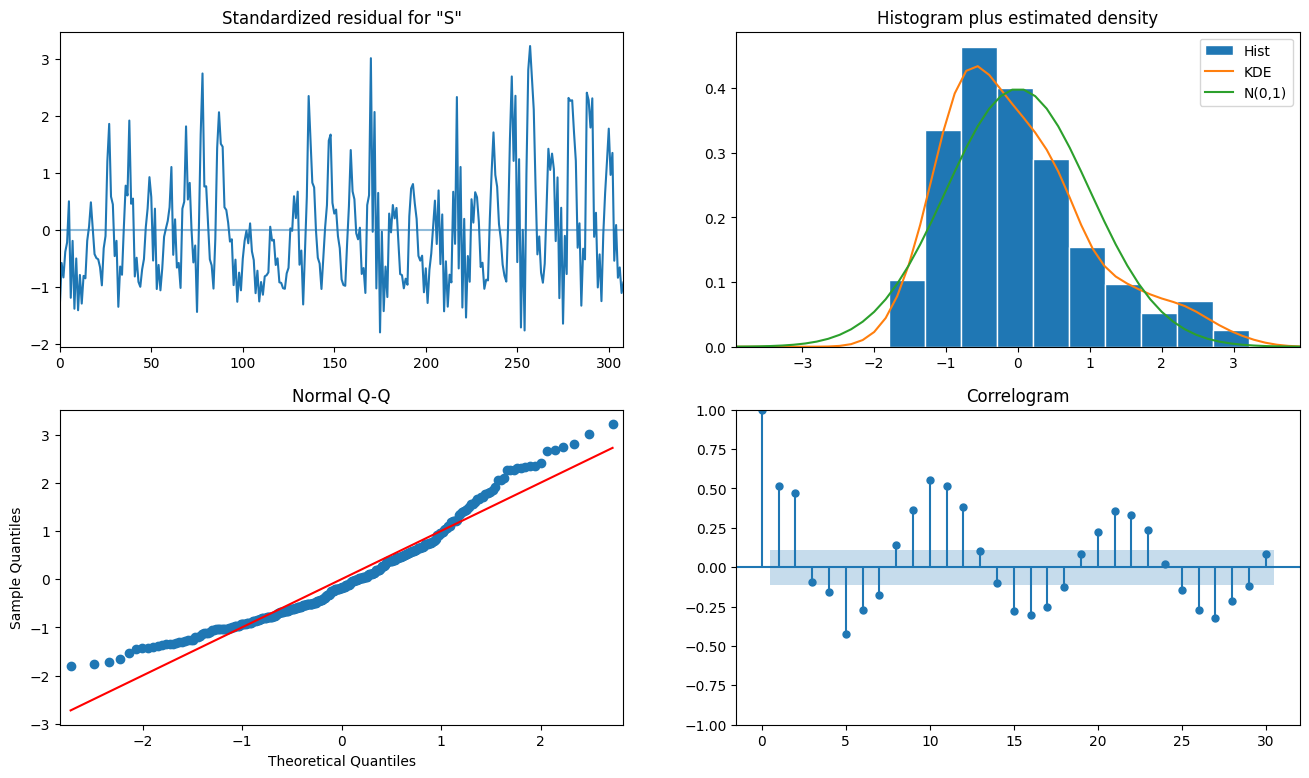

In [20]:
fig1 = plt.figure(figsize=(16,9))
fig1 = MA1.plot_diagnostics(fig=fig1, lags=30)

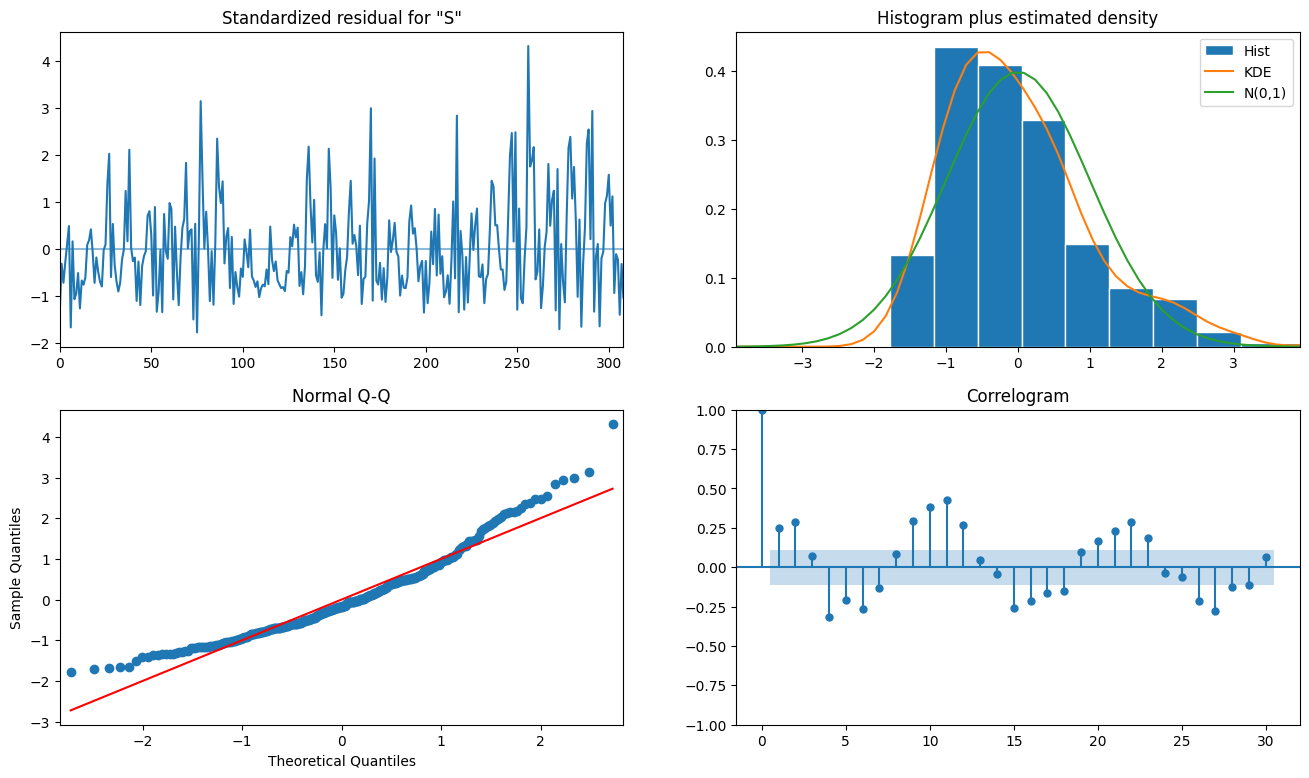

In [21]:
fig2 = plt.figure(figsize=(16,9))
fig2 = MA2.plot_diagnostics(fig=fig2, lags=30)

# ARMA

In [42]:
def ARMA_model_generation(ts, p, q):
  model = ARIMA(ts, order=[p,0,q])
  model_fit = model.fit()
  return model_fit

In [43]:
ARMA1 = ARMA_model_generation(data, 1, 1)
ARMA2 = ARMA_model_generation(data, 2, 2)

In [44]:
ARMA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Fri, 09 Aug 2024   AIC                           2713.226
Time:                        11:38:11   BIC                           2728.160
Sample:                             0   HQIC                          2719.197
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
ARMA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1304.436
Date:                Fri, 09 Aug 2024   AIC                           2620.873
Time:                        11:28:21   BIC                           2643.273
Sample:                             0   HQIC                          2629.828
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7502      3.667     13.567      0.000      42.563      56.938
ar.L1          1.4460      0.077     18.755      0.000       1.295       1.597
ar.L2         -0.7458      0.064    -11.681      0.000      -0.871      -0.621
ma.L1         -0.1405      0.097     -1.447      0.148      -0.331       0.050
ma.L2          0.0691      0.079      0.874      0.382      -0.086       0.224
sigma2       269.5971     18.567     14.520      0.000     233.207     305.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               102.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
figura = plt.figure(figsize=(16,9))
figura = ARMA1.plot_diagnostics(fig=figura, lags=30)

In [ ]:
figura2 = plt.figure(figsize=(16,9))
figura2 = ARMA2.plot_diagnostics(fig=figura2, lags=30)

# Usando o Prophet

In [28]:
!pip uninstall -y pystan prophet
!pip install pystan==2.19.1.1
!pip install prophet



Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975281 sha256=418657fd4574e26e74a2f89f6259f5ecec89eb9b615dbbb02f88aa20f4ff1ff8
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan
  Using cached prophet-1.1.5-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
Using cached prophet-1.1.5-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.4 MB)


In [29]:
import prophet

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

<Axes: >

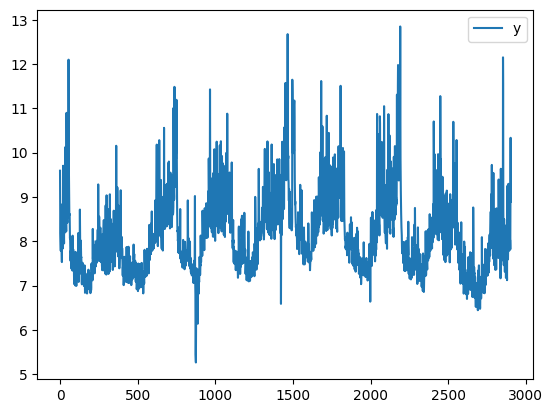

In [31]:
df.plot()

In [32]:
model = prophet.Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/xbgzjpzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/sp181inp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12521', 'data', 'file=/tmp/tmp5sbuqfg1/xbgzjpzr.json', 'init=/tmp/tmp5sbuqfg1/sp181inp.json', 'output', 'file=/tmp/tmp5sbuqfg1/prophet_modelageqjxlz/prophet_model-20240809113623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future = model.make_future_dataframe(periods=1000)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


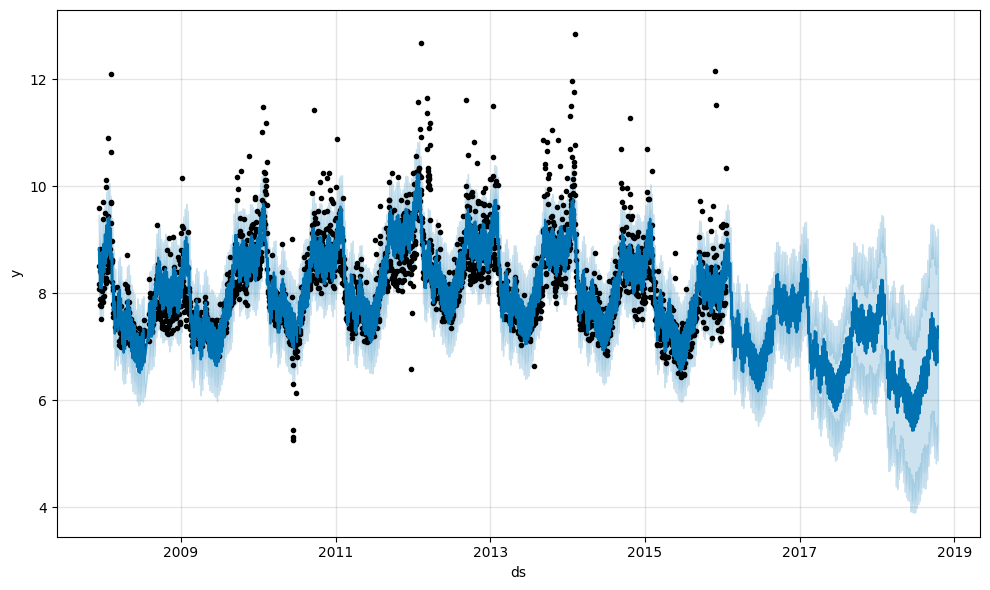

In [34]:
forecast = model.predict(future)
fig_1 = model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

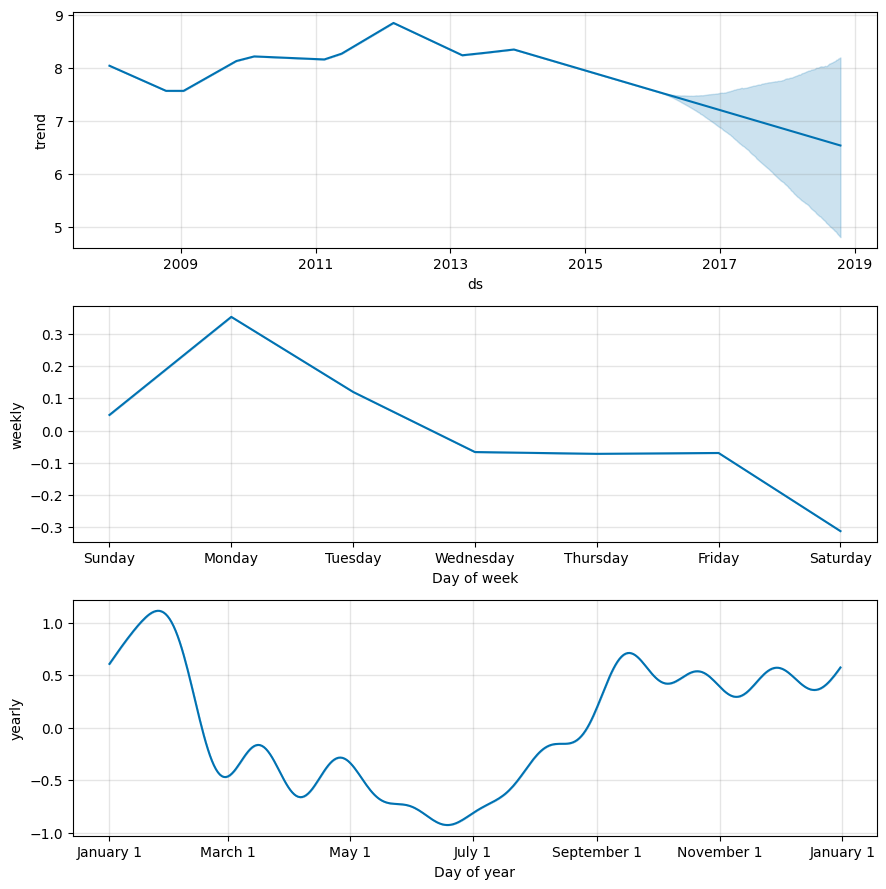

In [35]:
fig_2 = model.plot_components(forecast)

# Crescimento exponencial

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/hh8vgh9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/or2m4o77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65852', 'data', 'file=/tmp/tmp5sbuqfg1/hh8vgh9f.json', 'init=/tmp/tmp5sbuqfg1/or2m4o77.json', 'output', 'file=/tmp/tmp5sbuqfg1/prophet_modelv1gr51rc/prophet_model-20240809113627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

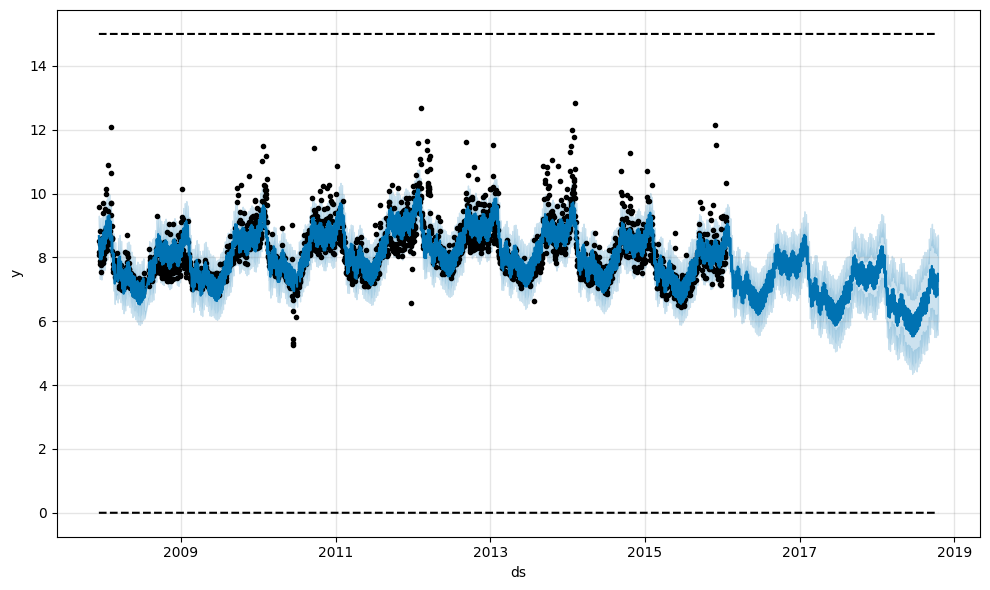

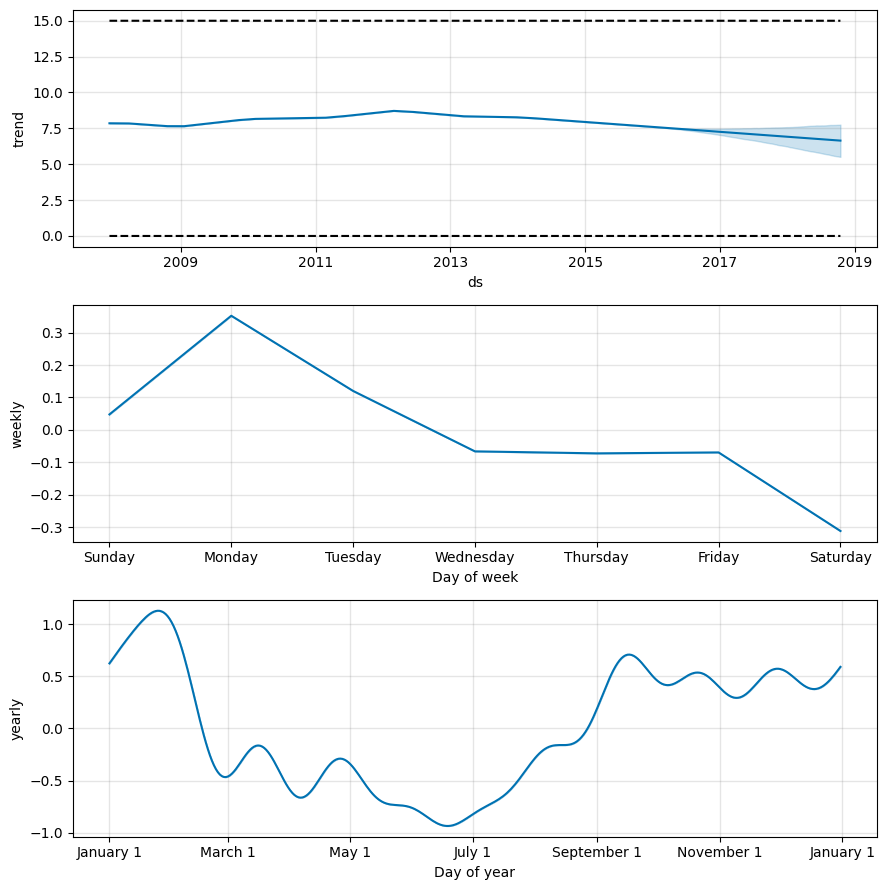

In [36]:
model = prophet.Prophet(growth='logistic', changepoint_prior_scale = 0.1, seasonality_prior_scale = 1.0)
df['cap'] = 15
df['floor'] = 0

model.fit(df)
future = model.make_future_dataframe(periods=1000)
future['cap'] = 15
future['floor'] = 0
forecast = model.predict(future)
fig_1 = model.plot(forecast)
fig_2 = model.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days',parallel='processes')

In [38]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.935997,8.421776,9.441874,8.242493,2010-02-15
1,2010-02-17,8.701972,8.232098,9.198241,8.008033,2010-02-15
2,2010-02-18,8.585069,8.118895,9.105442,8.045268,2010-02-15
3,2010-02-19,8.506515,7.966593,9.001176,7.928766,2010-02-15
4,2010-02-20,8.247779,7.735676,8.731671,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.646887,7.939451,9.398958,7.817223,2015-01-20
3984,2016-01-17,9.041550,8.358270,9.720944,9.273878,2015-01-20
3985,2016-01-18,9.348446,8.671297,10.031231,10.333775,2015-01-20
3986,2016-01-19,9.132185,8.380936,9.847543,9.125871,2015-01-20


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

# Hiperparametro

In [ ]:
import datetime

In [41]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

cutoffs = pd.to_datetime(['2013-02-15', '2014-08-15', '2014-02-15'])

#gerando combinaçoes de parametros

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []
mapes = []
for params in all_params:
  a = prophet.Prophet(**params).fit(df)
  df_cv = cross_validation(a, cutoffs=cutoffs, horizon='30 days', parallel='processes')
  df_p = performance_metrics(df_cv)
  rmses.append(df_p['rmse'].values[0])
  mapes.append(df_p['mape'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/j79n2oyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/_j39r_0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95776', 'data', 'file=/tmp/tmp5sbuqfg1/j79n2oyx.json', 'init=/tmp/tmp5sbuqfg1/_j39r_0q.json', 'output', 'file=/tmp/tmp5sbuqfg1/prophet_modelitgsy6d3/prophet_model-20240809113706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d9869f44c40>
DEBUG:cmdstanpy:input tempfil

    changepoint_prior_scale  seasonality_prior_scale      rmse      mape
0                     0.001                     0.01  0.804373  0.094251
1                     0.001                     0.10  0.805017  0.093857
2                     0.001                     1.00  0.799394  0.092630
3                     0.001                    10.00  0.808337  0.093892
4                     0.010                     0.01  0.581022  0.060320
5                     0.010                     0.10  0.575049  0.059830
6                     0.010                     1.00  0.557073  0.058000
7                     0.010                    10.00  0.549366  0.057246
8                     0.100                     0.01  0.516660  0.054344
9                     0.100                     0.10  0.512743  0.053706
10                    0.100                     1.00  0.514399  0.053913
11                    0.100                    10.00  0.505138  0.053145
12                    0.500                     0.0

In [45]:
best_param = all_params[np.argmin(rmses)]
print(best_param)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/a4bjmesh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/9y653lf8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93528', 'data', 'file=/tmp/tmp5sbuqfg1/a4bjmesh.json', 'init=/tmp/tmp5sbuqfg1/9y653lf8.json', 'output', 'file=/tmp/tmp5sbuqfg1/prophet_modelgqdo801y/prophet_model-20240809115131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:51:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:51:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

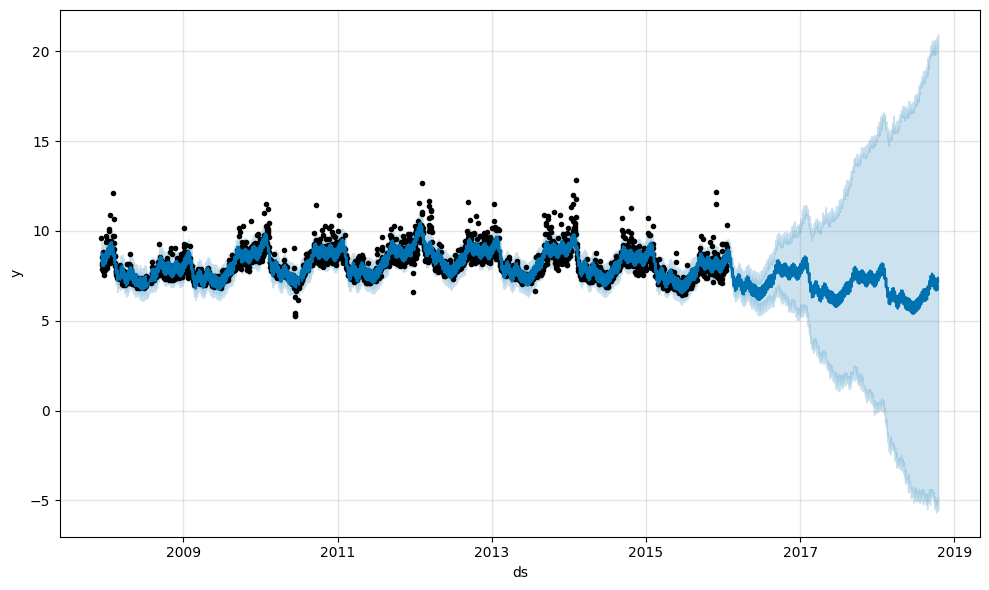

In [46]:
model = prophet.Prophet(**best_param).fit(df)
future = model.make_future_dataframe(periods=1000)
forecast = model.predict(future)
fig_1 = model.plot(forecast)

# Paralelização

In [48]:
!pip install dask

In [49]:

import dask.dataframe as dd
from dask.distributed import Client, LocalCluster

In [50]:
def random_walk_generator(n):
  steps = np.random.standard_normal(n)
  steps[0] = 0
  return np.cumsum(steps)

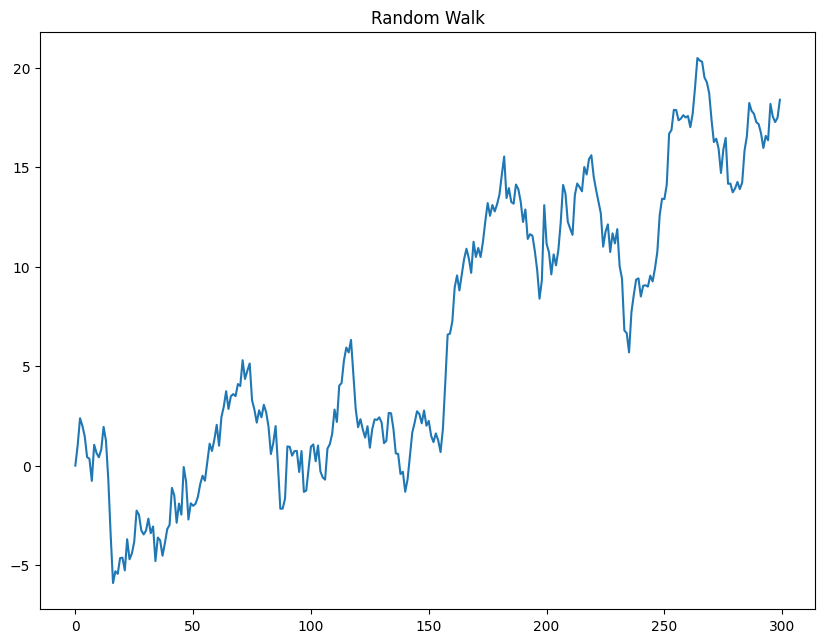

In [52]:
plt.figure(figsize=[10,7.5])
plt.plot(random_walk_generator(300))
plt.title('Random Walk')
plt.show()

In [54]:
times = pd.date_range('2012-10-01', periods=100, freq='1D')

In [60]:
df = pd.DataFrame(columns = ['ds', 'y', 'dimension']) # Change { } to [ ]
for column in range(30):
  aux_df = pd.DataFrame({'ds':times, 'y':random_walk_generator(100), 'dimension':column})
  df = pd.concat([df, aux_df], ignore_index=True) # Use concat instead of append

<ipython-input-60-e49aeac5bba9>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, aux_df], ignore_index=True) # Use concat instead of append


In [58]:
df

,ds,y,dimension
0,2012-10-01,0.000000,0
1,2012-10-02,0.542372,0
2,2012-10-03,0.548281,0
3,2012-10-04,0.608111,0
4,2012-10-05,-0.858377,0
...,...,...,...
2995,2013-01-04,-1.939893,29
2996,2013-01-05,-1.031911,29
2997,2013-01-06,-3.216307,29
2998,2013-01-07,-2.263463,29


In [61]:
def prophet_forecast(df):
  model = prophet.Prophet(changepoint_prior_scale=0.5)
  model.fit(df)
  future = model.make_future_dataframe(periods=10)
  forecast = model.predict(future)
  result = forecast[['ds','yhat','yhat_lower','yhat_upper']]
  return result

In [64]:
dff = dd.from_pandas(df, npartitions = 30)
meta = {'ds': 'datetime64[ns]', 'yhat': 'float64', 'yhat_lower': 'float64', 'yhat_upper': 'float64'}
grouped = dff.groupby('dimension').apply(prophet_forecast, meta=meta)


In [67]:
from threading import Thread
ClusterWorkers=8
ThreadPerWorker=1
cluster = LocalCluster(n_workers=ClusterWorkers, threads_per_worker=ThreadPerWorker, memory_limit='2GB')
client = Client(cluster)
client

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38349 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38735
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:38349/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34895'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44043'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45659'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39569'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35657'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41663'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42269'
INFO:distributed.nanny:        Start Nanny at:

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38349/status,
Dashboard: http://127.0.0.1:38349/status,Workers: 8
Total threads: 8,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38735,Workers: 8
Dashboard: http://127.0.0.1:38349/status,Total threads: 8
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:45629,Total threads: 1
Dashboard: http://127.0.0.1:46351/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:34895,


In [68]:
%%time
df.groupby('dimension').apply(prophet_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/c7c1nk4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5sbuqfg1/sdluwdc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44140', 'data', 'file=/tmp/tmp5sbuqfg1/c7c1nk4m.json', 'init=/tmp/tmp5sbuqfg1/sdluwdc4.json', 'output', 'file=/tmp/tmp5sbuqfg1/prophet_modeldtux85vy/prophet_model-20240809123729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

CPU times: user 19.4 s, sys: 5.41 s, total: 24.8 s
Wall time: 1min 27s


ds      yhat  yhat_lower  yhat_upper
dimension                                                 
0         0   2012-10-01  0.238427   -0.991510    1.541099
          1   2012-10-02  0.185273   -1.189359    1.508618
          2   2012-10-03 -0.205236   -1.557529    1.102953
          3   2012-10-04 -0.295819   -1.602253    0.970945
          4   2012-10-05 -0.327370   -1.670569    0.922837
...                  ...       ...         ...         ...
29        105 2013-01-14 -0.233471   -1.451331    1.013286
          106 2013-01-15 -0.228555   -1.457054    0.991352
          107 2013-01-16 -0.159202   -1.500613    1.076594
          108 2013-01-17  0.183556   -1.073078    1.434566
          109 2013-01-18  0.620038   -0.723398    1.980951

[3300 rows x 4 columns]

In [69]:
%%time
grouped.compute(num_workers=ClusterWorkers)

CPU times: user 9.68 s, sys: 3.69 s, total: 13.4 s
Wall time: 1min 16s


ds       yhat  yhat_lower  yhat_upper
dimension                                                  
7         0   2012-10-01   0.509237   -1.471192    2.385444
          1   2012-10-02   0.421232   -1.600165    2.345871
          2   2012-10-03   0.083262   -1.820367    1.913021
          3   2012-10-04  -0.000741   -1.810698    1.914524
          4   2012-10-05  -0.335524   -2.294964    1.587500
...                  ...        ...         ...         ...
17        105 2013-01-14  30.827635   29.361622   32.211069
          106 2013-01-15  31.399378   30.099643   32.768921
          107 2013-01-16  31.788362   30.226923   33.248823
          108 2013-01-17  31.753111   30.009731   33.337515
          109 2013-01-18  31.873572   30.162478   33.440105

[3300 rows x 4 columns]